In [1]:
import dill
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, HTML
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
INPUT_LOG_FILE = '../breast_cancer/log/breast_cancer_vectors_simple_xgb.log'
MONTH = 12

df_all = pd.read_csv(INPUT_LOG_FILE, header=None, index_col=None)
df_all.columns = ['model', 'month', 'auc', 'll']

df = df_all[df_all['month'] == MONTH]


def label_algo(row):
    info = row['model'].split('_')
    return info[2]

def label_softmax(row):
    info = row['model'].split('_')
    return info[3]

def label_window(row):
    info = row['model'].split('_')
    return int(info[4].split('-')[1])

def label_size(row):
    info = row['model'].split('_')
    return int((info[5].split('-')[1]).split('.')[0])

df['algo'] = df.apply(lambda row: label_algo(row),axis=1)
df['softmax'] = df.apply(lambda row: label_softmax(row),axis=1)
df['window'] = df.apply(lambda row: label_window(row),axis=1)
df['size'] = df.apply(lambda row: label_size(row),axis=1)

df.drop(['model','ll'], axis=1, inplace=True)

min_auc, max_auc = df['auc'].min(), df['auc'].max()

df.head()

,month,auc,algo,softmax,window,size
4,12,0.822811,pvdbow,hs,10,100
9,12,0.835889,pvdbow,hs,10,300
14,12,0.811197,pvdbow,hs,10,500
19,12,0.824705,pvdbow,hs,20,100
24,12,0.836269,pvdbow,hs,20,300


In [3]:
# PV-DM, HS
df_q1 = df[(df['algo'] == 'pvdm') & (df['softmax'] == 'hs')]
df_q1

q1 = df_q1.pivot("size", "window", "auc")

# PV-DM, NS
df_q2 = df[(df['algo'] == 'pvdm') & (df['softmax'] == 'ns')]
df_q2

q2 = df_q2.pivot("size", "window", "auc")

# PV-DBOW, HS
df_q3 = df[(df['algo'] == 'pvdbow') & (df['softmax'] == 'hs')]
df_q3

q3 = df_q3.pivot("size", "window", "auc")

# PV-DBOW, NS
df_q4 = df[(df['algo'] == 'pvdbow') & (df['softmax'] == 'ns')]
df_q4

q4 = df_q4.pivot("size", "window", "auc")

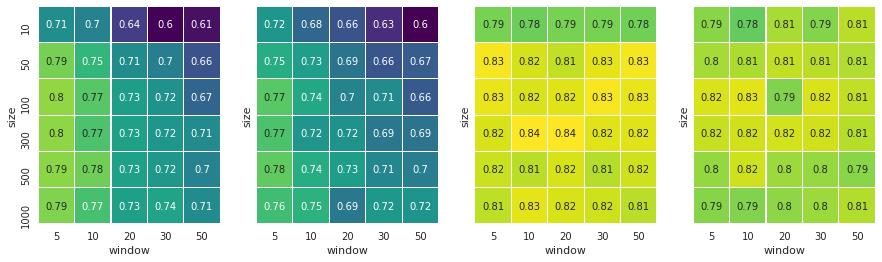

In [4]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

# min_auc, max_auc = 0.6, 0.9


sns.heatmap(q1, vmin=min_auc, vmax=max_auc, cmap=cm.viridis, annot=True, linewidths=.1, ax=ax1, cbar=False)
sns.heatmap(q2, vmin=min_auc, vmax=max_auc, cmap=cm.viridis, annot=True, linewidths=.1, ax=ax2, cbar=False)
sns.heatmap(q3, vmin=min_auc, vmax=max_auc, cmap=cm.viridis, annot=True, linewidths=.1, ax=ax3, cbar=False)
sns.heatmap(q4, vmin=min_auc, vmax=max_auc, cmap=cm.viridis, annot=True, linewidths=.1, ax=ax4, cbar=False)

In [44]:
norm = matplotlib.colors.Normalize(min_auc, max_auc)

rows = []


for embedding_size in [10,50,100,300,500,1000]:
    row = []
    for algo in ['pvdm', 'pvdbow']:
        for softmax in ['hs', 'ns']:
            for window_size in [5, 10, 20, 30, 50]:
                value = df[(df['algo'] == algo) & (df['softmax'] == softmax) & (df['size'] == embedding_size) & (df['window'] == window_size)]['auc'].values[0]
                bgcolor = matplotlib.colors.rgb2hex(matplotlib.cm.viridis(norm(value)))
                if value <= 0.775:
                    text = "\textcolor{{white}}{{{:.2f}}}".format(value)
                else:
                    text = "{:.2f}".format(value)
                    
                row.append("\cellcolor[HTML]{{{}}} {}".format(bgcolor[1:], text))
                
    rows.append(" & ".join(row))

In [46]:
rows

['\\cellcolor[HTML]{228d8d} \textcolor{white}{0.71} & \\cellcolor[HTML]{26828e} \textcolor{white}{0.70} & \\cellcolor[HTML]{433e85} \textcolor{white}{0.64} & \\cellcolor[HTML]{440256} \textcolor{white}{0.60} & \\cellcolor[HTML]{471063} \textcolor{white}{0.61} & \\cellcolor[HTML]{1f968b} \textcolor{white}{0.72} & \\cellcolor[HTML]{31678e} \textcolor{white}{0.68} & \\cellcolor[HTML]{3a538b} \textcolor{white}{0.66} & \\cellcolor[HTML]{472d7b} \textcolor{white}{0.63} & \\cellcolor[HTML]{440154} \textcolor{white}{0.60} & \\cellcolor[HTML]{77d153} 0.79 & \\cellcolor[HTML]{6ccd5a} 0.78 & \\cellcolor[HTML]{77d153} 0.79 & \\cellcolor[HTML]{77d153} 0.79 & \\cellcolor[HTML]{70cf57} 0.78 & \\cellcolor[HTML]{89d548} 0.79 & \\cellcolor[HTML]{65cb5e} 0.78 & \\cellcolor[HTML]{a8db34} 0.81 & \\cellcolor[HTML]{84d44b} 0.79 & \\cellcolor[HTML]{bade28} 0.81',
 '\\cellcolor[HTML]{75d054} 0.79 & \\cellcolor[HTML]{32b67a} \textcolor{white}{0.75} & \\cellcolor[HTML]{228c8d} \textcolor{white}{0.71} & \\cellcol